In [2]:
import json
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

# df = getDF('reviews_Video_Games.json.gz')

In [3]:
df1 = getDF("AMAZON_FASHION.json.gz")
df2 = getDF("meta_AMAZON_FASHION.json.gz")

# df1 =  getDF("Books.json.gz") # 30분이 넘어가도 되지않아서 일단 중단

KeyboardInterrupt: 

### 결측값 확인

In [3]:
print(df1.isnull().sum())
# 리뷰 텍스트가 없는 건 필요없을 듯함

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          92
reviewText          1233
summary              533
unixReviewTime         0
vote              803736
style             579067
image             854829
dtype: int64


### 데이터 분포 확인

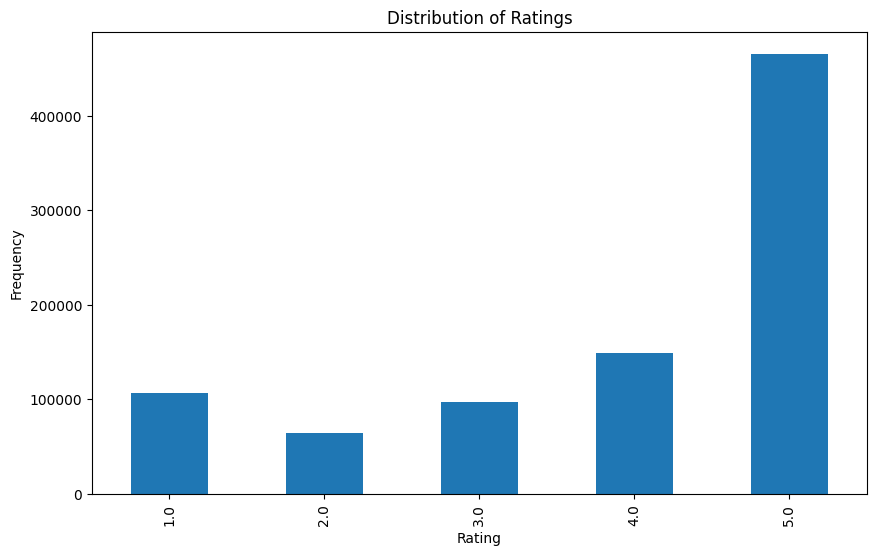

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df1['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 사용자 및 제품 리뷰 수

In [15]:
user_review_counts

reviewerID
A3G5KDMFNRUXHB    40
A3JBQHQZEZPQK4    36
A1RRX286ZRI830    32
A2PBHVTPTIIGKR    31
A2GP4EJIAA2OE0    29
                  ..
A3F8ZWBOAZUZE2     1
A2HI8EO6V5PST8     1
A3GKQ3VSTGLAHW     1
A3HEDQXYV9OCVR     1
A2RSX9E79DUHRX     1
Name: count, Length: 749233, dtype: int64

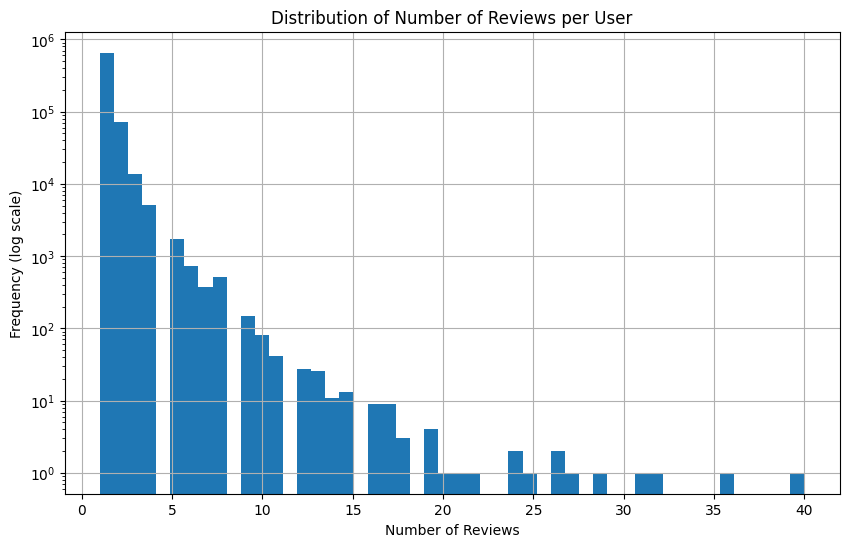

In [7]:
# 사용자별 리뷰 수 분포
user_review_counts = df1['reviewerID'].value_counts()
plt.figure(figsize=(10, 6))
user_review_counts.hist(bins=50)
plt.yscale('log')
plt.title('Distribution of Number of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency (log scale)')
plt.show()

In [16]:
product_review_counts

asin
B000V0IBDM    4384
B000KPIHQ4    4375
B00I0VHS10    3889
B00RLSCLJM    3638
B000PHANNM    2572
              ... 
B00VQHSOE0       1
B00VQH61O0       1
B00VQGEHII       1
B00VQGZT76       1
B01HJG5NMW       1
Name: count, Length: 186189, dtype: int64

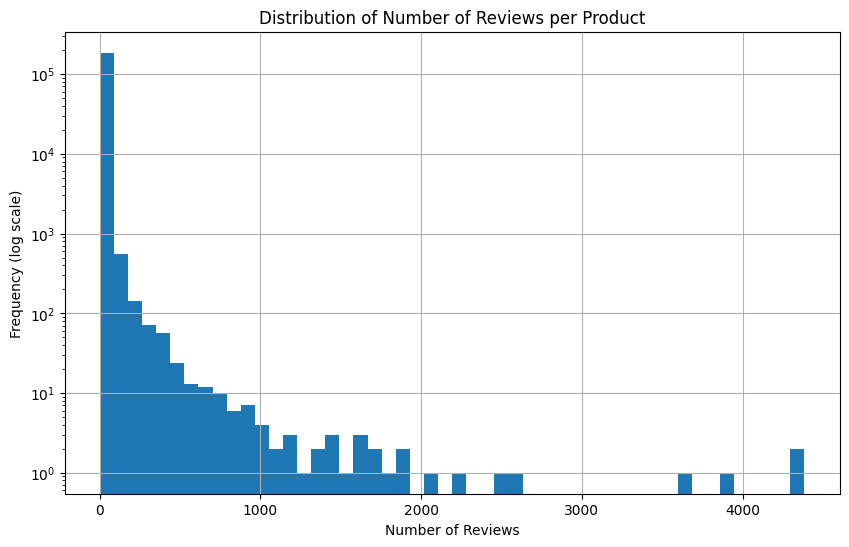

In [8]:
# 제품별 리뷰 수 분포
product_review_counts = df1['asin'].value_counts()
plt.figure(figsize=(10, 6))
product_review_counts.hist(bins=50)
plt.yscale('log')
plt.title('Distribution of Number of Reviews per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency (log scale)')
plt.show()

### 리뷰 텍스트 분석

In [5]:
df1['review_length'] = df1['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [9]:
df1.groupby("review_length")["reviewerID"].count()

review_length
0        1237
1       30608
2       52351
3       32647
4       35955
        ...  
1235        2
1289        2
1361        1
1744        1
2088        1
Name: reviewerID, Length: 681, dtype: int64

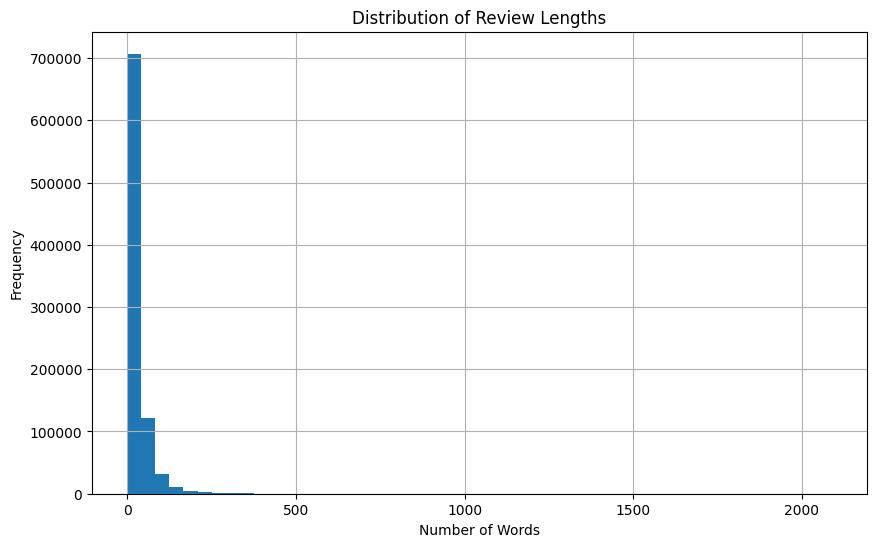

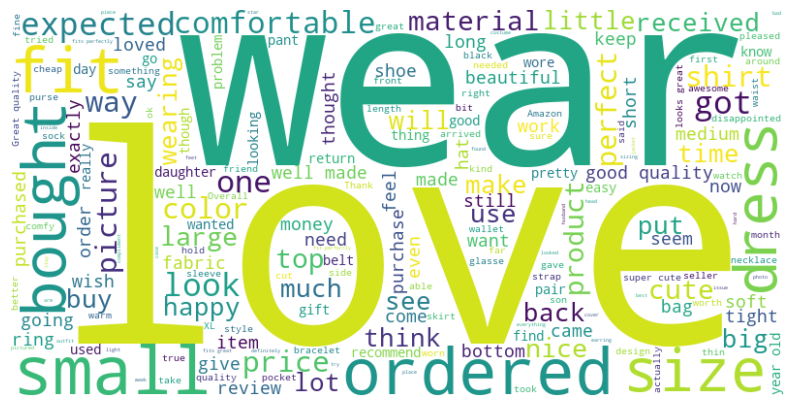

In [9]:
# 리뷰 길이 분포
df1['review_length'] = df1['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
plt.figure(figsize=(10, 6))
df1['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 워드 클라우드 생성
from wordcloud import WordCloud

text = ' '.join(df1['reviewText'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
df1[df1['review_length'] == 3 ]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,review_length
73,2.0,True,"03 17, 2015",AY7JAF0XNNP2Y,B00007GDFV,sandi,doesn't fit 100's,Two Stars,1426550400,NaN,{'Color:': ' Black'},NaN,3
115,2.0,True,"10 14, 2015",A23FAZEVCMA39K,B00008JOQI,John Meetz,Fits too big,Two Stars,1444780800,NaN,"{'Size:': ' 16.5 - 32', 'Color:': ' Ecru'}",NaN,3
116,5.0,True,"09 28, 2015",ARSZJ2AHK4QRO,B00008JOQI,gregory parson,Good quality shirt.,Five Stars,1443398400,NaN,"{'Size:': ' 19 - 36', 'Color:': ' White'}",NaN,3
150,5.0,True,"05 4, 2016",A212EK7NBRSTPD,B00008JVTT,kidcarrjr,Very nice shirt.,Very nice shirt.,1462320000,NaN,"{'Size:': ' 17.5 - 33', 'Color:': ' White'}",NaN,3
258,5.0,False,"12 30, 2016",A3ICSTLTNV0DWK,B0002UQASO,Jan Warr,He loved it!,Five Stars,1483056000,NaN,"{'Size:': ' 17 - 34', 'Color:': ' White'}",NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883522,1.0,True,"03 15, 2017",A2LHHYCZQ8XK6I,B01HJ5WMAO,Amazon Customer,Horrible sizing! Booooooo!,One Star,1489536000,NaN,NaN,NaN,3
883527,5.0,True,"04 23, 2018",A3UDKIP3U57K6R,B01HJ6HHD0,Adele Odegaard,What I wanted.,Five Stars,1524441600,NaN,NaN,NaN,3
883549,5.0,True,"08 18, 2017",A32VYYZNXR2JV9,B01HJBEJ4A,Virgina Brandon,love this shoe,Five Stars,1503014400,NaN,NaN,NaN,3
883555,5.0,True,"03 20, 2017",A27UQ3GD0QKY9I,B01HJB221C,Jodi Walbaum-Vaniman,LOVE THE PANTS,LOVEUM BUT GET ONE SIZE BIGGER,1489968000,2,NaN,NaN,3


In [9]:
userID = df1["reviewerID"].sample(100, random_state = 14)

In [29]:
df = df1.groupby("reviewerID")["asin"].count()
df[df > 1]

reviewerID
A00248626G99Y8GVGKKQ     4
A0036810AKGSUKHOLV23     2
A0045558RLEOANWJ9H6A     2
A0050738JJ18X5V1HIYT     2
A0054271FXCGYGCKW9TH     2
                        ..
AZZT1ERHBSNQ8            4
AZZT21W56P0NT            2
AZZUCNBM6ZPP5            2
AZZWPNME0GQZ2            2
AZZXCFBNEWIBQ           11
Name: asin, Length: 93913, dtype: int64

In [30]:
import koreanize_matplotlib # 한글이깨져서사용
import matplotlib.pyplot as plt



,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5.0,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2,NaN,NaN
883633,3.0,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3.0,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [32]:
import plotly as plt

plt.

TypeError: count() takes 1 positional argument but 2 were given

In [30]:
df1[df1["asin"] == "0764443682"]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
407112,5.0,True,"11 26, 2012",A1ZDIY3YF4Q48D,0764443682,Robin B,Group always does an excellent job with VBS so...,"Fun, Fun, Fun",1353888000,NaN,NaN,NaN


In [33]:
df2[df2["asin"] == "0764443682"]

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df2[df2["imageURL"].notnull()]["imageURL"][0]

['https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL._US40_.jpg']

In [3]:
df3 = getDF("All_Amazon_Review.json.gz")